### Analysis notebook for Class Project

- Save data in CSV
- Plot throughout figure with respect to bandwidth, latency, packet loss

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_datadir='/home/tkurihana/class/networking/NSD-Project-Rui/tf-benchmark/log'

In [18]:
def log_getter_fn(base_datadir, 
                  dataname, 
                  mtype, batch_sizes, losses, bandwidths, delays):
    """
    data : time, throughput
    """
    datalist = []
    header = ['delay', 'bandwidth', 'packet_loss', 'batch_size', 'throughput']
    for nbatch in batch_sizes:
        for loss in losses:
            for bandwidth in bandwidths:
                for delay in delays:
                    ifile = os.path.join(base_datadir,
                        dataname+'/'+str(mtype)+'_'+str(nbatch)+'-'+str(loss)+'ps-'+str(bandwidth)+'mbit-'+str(delay)+'ms.txt'
                    )
                    tmp_data = np.loadtxt(ifile,delimiter=',')
                    throughput = tmp_data[1]
                    data = np.asarray([int(delay), int(bandwidth), int(loss), int(nbatch), throughput])
                    datalist.append(data)
    array = np.asarray(datalist)
    df = pd.DataFrame(array)
    df.columns = header
    return df

In [19]:
### params 
datanames = ['mnist', 'imagenet']
mtypes = ['mlp', 'mobilenet', 'resnet']
batch_sizes = [32, 128, 1024]
losses = [0, 1, 10]
bandwidths = [1000, 500, 100]
delays = [1, 10, 100,]

In [20]:
mnist_dataset = []
for mtype in mtypes:
    mnist_dataset.append(
        log_getter_fn(
            base_datadir, 'mnist',mtype,batch_sizes, losses, bandwidths, delays
        )               
    )

In [21]:
mnist_dataset[0]

,delay,bandwidth,packet_loss,batch_size,throughput
0,1.0,1000.0,0.0,32.0,245.090094
1,10.0,1000.0,0.0,32.0,7.633273
2,100.0,1000.0,0.0,32.0,7.017627
3,1.0,500.0,0.0,32.0,299.186970
4,10.0,500.0,0.0,32.0,18.175055
...,...,...,...,...,...
76,10.0,500.0,10.0,1024.0,549.733942
77,100.0,500.0,10.0,1024.0,527.202064
78,1.0,100.0,10.0,1024.0,334.223797
79,10.0,100.0,10.0,1024.0,365.435748


In [22]:
imagenet_dataset = []
for mtype in mtypes:
    imagenet_dataset.append(
        log_getter_fn(
            base_datadir, 'imagenet',mtype,batch_sizes, losses, bandwidths, delays
        )               
    )

In [23]:
imagenet_dataset[0]

,delay,bandwidth,packet_loss,batch_size,throughput
0,1.0,1000.0,0.0,32.0,135.068460
1,10.0,1000.0,0.0,32.0,3.287783
2,100.0,1000.0,0.0,32.0,3.489110
3,1.0,500.0,0.0,32.0,6.800478
4,10.0,500.0,0.0,32.0,6.260554
...,...,...,...,...,...
76,10.0,500.0,10.0,1024.0,2504.015574
77,100.0,500.0,10.0,1024.0,1708.945016
78,1.0,100.0,10.0,1024.0,764.587349
79,10.0,100.0,10.0,1024.0,746.595898


### Save csv files

In [24]:
base_savedir = '/home/tkurihana/class/networking/NSD-Project-Rui/tf-benchmark'

In [25]:
# mnist
for idx, m in enumerate(mtypes):
    mnist_dataset[idx].to_csv(os.path.join(base_savedir+'/mnist_benchmarks' , "tf_mnist_"+str(m)+".csv"))

In [26]:
# imagenet
for idx, m in enumerate(mtypes):
    imagenet_dataset[idx].to_csv(os.path.join(base_savedir+'/imagenet_benchmarks' , "tf_mnist_"+str(m)+".csv"))

### Load csv & Visualize
Memo: Resnet min value gets lower than 1 --> cannot use log y scale 

In [27]:
base_tfdir='/home/tkurihana/class/networking/NSD-Project-Rui/tf-benchmark/'

- Load MNIST MLP

In [95]:
data  = pd.read_csv(glob.glob(os.path.join(base_tfdir, 'mnist_benchmarks/*mlp*.csv'))[0], index_col=0)

In [96]:
data

,delay,bandwidth,packet_loss,batch_size,throughput
0,1.0,1000.0,0.0,32.0,245.090094
1,10.0,1000.0,0.0,32.0,7.633273
2,100.0,1000.0,0.0,32.0,7.017627
3,1.0,500.0,0.0,32.0,299.186970
4,10.0,500.0,0.0,32.0,18.175055
...,...,...,...,...,...
76,10.0,500.0,10.0,1024.0,549.733942
77,100.0,500.0,10.0,1024.0,527.202064
78,1.0,100.0,10.0,1024.0,334.223797
79,10.0,100.0,10.0,1024.0,365.435748


- search data

In [31]:
tmp = data.query(" delay == 1 & batch_size == 32")

In [32]:
tmp

,delay,bandwidth,packet_loss,batch_size,throughput
0,1.0,1000.0,0.0,32.0,245.090094
3,1.0,500.0,0.0,32.0,299.186970
6,1.0,100.0,0.0,32.0,28.747348
9,1.0,1000.0,1.0,32.0,220.498143
12,1.0,500.0,1.0,32.0,231.329640
15,1.0,100.0,1.0,32.0,126.273808
18,1.0,1000.0,10.0,32.0,17.001682
21,1.0,500.0,10.0,32.0,16.537147
24,1.0,100.0,10.0,32.0,13.719517


In [33]:
tmp = data[(data['delay']==1) & (data['batch_size']==32) & (data['bandwidth']==1000) & (data['packet_loss']==0) ]

In [34]:
tmp

,delay,bandwidth,packet_loss,batch_size,throughput
0,1.0,1000.0,0.0,32.0,245.090094


In [48]:
throughput_list = []
for j in [32,128,1024]:
    tmp_list = []
    for i in [1,10,100]:
        _array = data[(data['delay']==i) & (data['batch_size']==j) & (data['bandwidth']==1000) & (data['packet_loss']==0)].values
        tmp_list.append(_array[0,-1])
    throughput_list.append(tmp_list)

In [49]:
throughput_list

[[245.0900944267218, 7.633273144814438, 7.017626620080351],
 [1012.5203865379714, 27.3987658766697, 30.09365054973613],
 [8184.225005550118, 242.40611314943757, 218.09325220331417]]

- visualization : Latency for mnist at bandwidth == 1000, packet loss ==0

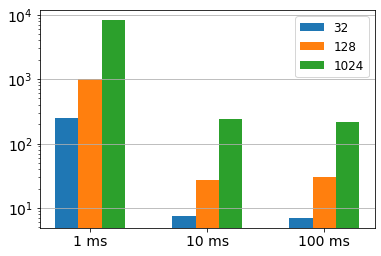

In [73]:
plt.figure(figsize=(6,4))
for idx, _th in enumerate(throughput_list):
    x = [i + idx*0.2 for i in range(len(_th))]
    plt.bar(x,_th, width=0.2, label=str(batch_sizes[idx]))
    if idx == 1:
        plt.xticks(x, ['1 ms', '10 ms', '100 ms'],fontsize=14)
plt.yscale('log')
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.legend(fontsize=12)
plt.show()

#### Make automatic figure

- MLP - Delay - Batch size

In [79]:
data['throughput'].max()

9558.672621800755

In [99]:
### delay 
base_savedir = './fig/mnist/mlp/delay'
os.makedirs(base_savedir, exist_ok=True)
for iloss in [0, 1,10]:
    for ibandwidth in [1000, 500, 100]:
        
        # data query
        throughput_list = []
        for ibatch in [32,128,1024]:
            tmp_list = []
            for idelay in [1,10,100]:
                _array = data[(data['delay']==idelay) & (data['batch_size']==ibatch) & (data['bandwidth']==ibandwidth) & (data['packet_loss']==iloss)].values
                tmp_list.append(_array[0,-1])
            throughput_list.append(tmp_list)
            
        # data vis
        fig = plt.figure(figsize=(6,4))
        for idx, _th in enumerate(throughput_list):
            x = [i + idx*0.2 for i in range(len(_th))]
            plt.bar(x,_th, width=0.2, label=str(batch_sizes[idx]))
            if idx == 1:
                plt.xticks(x, ['1 ms', '10 ms', '100 ms'],fontsize=14)
        plt.yscale('log')
        plt.yticks(fontsize=14)
        plt.ylim(1,10**5)
        plt.ylabel("Throughput [Image/sec]", fontsize=14)
        plt.xlabel("Latency", fontsize=14)
        plt.grid(True, axis='y')
        plt.legend(fontsize=12)
        fig.tight_layout()
        plt.savefig(os.path.join(base_savedir, 'fig_delays_bandwidth-'+str(ibandwidth)+'_ps-'+str(iloss)+'.png'))
        plt.close()

#### MLP - bandwidth Batch size

In [101]:
### bandwidth
base_savedir = './fig/mnist/mlp/bandwidth'
os.makedirs(base_savedir, exist_ok=True)
for iloss in [0, 1,10]:
    for idelay in [1, 10, 100]:
        
        # data query
        throughput_list = []
        for ibatch in [32,128,1024]:
            tmp_list = []
            for ibandwidth in [1000, 500, 100]:
                _array = data[(data['delay']==idelay) & (data['batch_size']==ibatch) & (data['bandwidth']==ibandwidth) & (data['packet_loss']==iloss)].values
                tmp_list.append(_array[0,-1])
            throughput_list.append(tmp_list)
            
        # data vis
        fig= plt.figure(figsize=(6,4))
        for idx, _th in enumerate(throughput_list):
            x = [i + idx*0.2 for i in range(len(_th))]
            plt.bar(x,_th, width=0.2, label=str(batch_sizes[idx]))
            if idx == 1:
                plt.xticks(x, ['1000 mbit', '500 mbit', '100 mbit'],fontsize=14)
        plt.yscale('log')
        plt.yticks(fontsize=14)
        plt.ylim(1,10**5)
        plt.ylabel("Throughput [Image/sec]", fontsize=14)
        plt.xlabel("Bandwidth", fontsize=14)
        plt.grid(True, axis='y')
        plt.legend(fontsize=12)
        fig.tight_layout()
        plt.savefig(os.path.join(base_savedir, 'fig_bandwidth_delay-'+str(idelay)+'_ps-'+str(iloss)+'.png'))
        plt.close()

#### MLP - packet loss -  Batch size

In [102]:
### packet loss
base_savedir = './fig/mnist/mlp/packet_loss'
os.makedirs(base_savedir, exist_ok=True)
for ibandwidth in [1000, 500, 100]:
    for idelay in [1, 10, 100]:
        
        # data query
        throughput_list = []
        for ibatch in [32,128,1024]:
            tmp_list = []
            for iloss in [0, 1, 10]:
                _array = data[(data['delay']==idelay) & (data['batch_size']==ibatch) & (data['bandwidth']==ibandwidth) & (data['packet_loss']==iloss)].values
                tmp_list.append(_array[0,-1])
            throughput_list.append(tmp_list)
            
        # data vis
        fig = plt.figure(figsize=(6,4))
        for idx, _th in enumerate(throughput_list):
            x = [i + idx*0.2 for i in range(len(_th))]
            plt.bar(x,_th, width=0.2, label=str(batch_sizes[idx]))
            if idx == 1:
                plt.xticks(x, ['0 %', '1 %', '10 %'],fontsize=14)
        plt.yscale('log')
        plt.yticks(fontsize=14)
        plt.ylim(1,10**5)
        plt.ylabel("Throughput [Image/sec]", fontsize=14)
        plt.xlabel("Packet Loss", fontsize=14)
        plt.grid(True, axis='y')
        plt.legend(fontsize=12)
        fig.tight_layout()
        plt.savefig(os.path.join(base_savedir, 'fig_PacketLoss_delay-'+str(idelay)+'_bandwidth-'+str(ibandwidth)+'.png'))
        plt.close()

- MNIST Mobilenet

In [117]:
data  = pd.read_csv(glob.glob(os.path.join(base_tfdir, 'mnist_benchmarks/*mobilenet*.csv'))[0], index_col=0)

In [104]:
data['throughput'].max(), data['throughput'].min()

(12313.347634355448, 1.091783400532328)

#### Mobilenet - Delay - Batch size

In [118]:
### delay 
base_savedir = './fig/mnist/mobilenet/delay'
os.makedirs(base_savedir, exist_ok=True)
for iloss in [0, 1,10]:
    for ibandwidth in [1000, 500, 100]:
        
        # data query
        throughput_list = []
        for ibatch in [32,128,1024]:
            tmp_list = []
            for idelay in [1,10,100]:
                _array = data[(data['delay']==idelay) & (data['batch_size']==ibatch) & (data['bandwidth']==ibandwidth) & (data['packet_loss']==iloss)].values
                tmp_list.append(_array[0,-1])
            throughput_list.append(tmp_list)
            
        # data vis
        fig = plt.figure(figsize=(6,4))
        for idx, _th in enumerate(throughput_list):
            x = [i + idx*0.2 for i in range(len(_th))]
            plt.bar(x,_th, width=0.2, label=str(batch_sizes[idx]))
            if idx == 1:
                plt.xticks(x, ['1 ms', '10 ms', '100 ms'],fontsize=14)
        plt.yscale('log')
        plt.yticks(fontsize=14)
        plt.ylim(1,10**5)
        plt.ylabel("Throughput [Image/sec]", fontsize=14)
        plt.xlabel("Latency", fontsize=14)
        plt.grid(True, axis='y')
        plt.legend(fontsize=12)
        fig.tight_layout()
        plt.savefig(os.path.join(base_savedir, 'fig_delays_bandwidth-'+str(ibandwidth)+'_ps-'+str(iloss)+'.png'))
        plt.close()

In [119]:
### bandwidth
base_savedir = './fig/mnist/mobilenet/bandwidth'
os.makedirs(base_savedir, exist_ok=True)
for iloss in [0, 1,10]:
    for idelay in [1, 10, 100]:
        
        # data query
        throughput_list = []
        for ibatch in [32,128,1024]:
            tmp_list = []
            for ibandwidth in [1000, 500, 100]:
                _array = data[(data['delay']==idelay) & (data['batch_size']==ibatch) & (data['bandwidth']==ibandwidth) & (data['packet_loss']==iloss)].values
                tmp_list.append(_array[0,-1])
            throughput_list.append(tmp_list)
            
        # data vis
        fig= plt.figure(figsize=(6,4))
        for idx, _th in enumerate(throughput_list):
            x = [i + idx*0.2 for i in range(len(_th))]
            plt.bar(x,_th, width=0.2, label=str(batch_sizes[idx]))
            if idx == 1:
                plt.xticks(x, ['1000 mbit', '500 mbit', '100 mbit'],fontsize=14)
        plt.yscale('log')
        plt.yticks(fontsize=14)
        plt.ylim(1,10**5)
        plt.ylabel("Throughput [Image/sec]", fontsize=14)
        plt.xlabel("Bandwidth", fontsize=14)
        plt.grid(True, axis='y')
        plt.legend(fontsize=12)
        fig.tight_layout()
        plt.savefig(os.path.join(base_savedir, 'fig_bandwidth_delay-'+str(idelay)+'_ps-'+str(iloss)+'.png'))
        plt.close()

In [120]:
### packet loss
base_savedir = './fig/mnist/mobilenet/packet_loss'
os.makedirs(base_savedir, exist_ok=True)
for ibandwidth in [1000, 500, 100]:
    for idelay in [1, 10, 100]:
        
        # data query
        throughput_list = []
        for ibatch in [32,128,1024]:
            tmp_list = []
            for iloss in [0, 1, 10]:
                _array = data[(data['delay']==idelay) & (data['batch_size']==ibatch) & (data['bandwidth']==ibandwidth) & (data['packet_loss']==iloss)].values
                tmp_list.append(_array[0,-1])
            throughput_list.append(tmp_list)
            
        # data vis
        fig = plt.figure(figsize=(6,4))
        for idx, _th in enumerate(throughput_list):
            x = [i + idx*0.2 for i in range(len(_th))]
            plt.bar(x,_th, width=0.2, label=str(batch_sizes[idx]))
            if idx == 1:
                plt.xticks(x, ['0 %', '1 %', '10 %'],fontsize=14)
        plt.yscale('log')
        plt.yticks(fontsize=14)
        plt.ylim(1,10**5)
        plt.ylabel("Throughput [Image/sec]", fontsize=14)
        plt.xlabel("Packet Loss", fontsize=14)
        plt.grid(True, axis='y')
        plt.legend(fontsize=12)
        fig.tight_layout()
        plt.savefig(os.path.join(base_savedir, 'fig_PacketLoss_delay-'+str(idelay)+'_bandwidth-'+str(ibandwidth)+'.png'))
        plt.close()

#### Resnet - mnist

In [111]:
data  = pd.read_csv(glob.glob(os.path.join(base_tfdir, 'mnist_benchmarks/*resnet*.csv'))[0], index_col=0)

In [113]:
data['throughput'].max(), data['throughput'].min()

(324.77516886139165, 0.15431451682549527)

In [114]:
### delay 
base_savedir = './fig/mnist/resnet/delay'
os.makedirs(base_savedir, exist_ok=True)
for iloss in [0, 1,10]:
    for ibandwidth in [1000, 500, 100]:
        
        # data query
        throughput_list = []
        for ibatch in [32,128,1024]:
            tmp_list = []
            for idelay in [1,10,100]:
                _array = data[(data['delay']==idelay) & (data['batch_size']==ibatch) & (data['bandwidth']==ibandwidth) & (data['packet_loss']==iloss)].values
                tmp_list.append(_array[0,-1])
            throughput_list.append(tmp_list)
            
        # data vis
        fig = plt.figure(figsize=(6,4))
        for idx, _th in enumerate(throughput_list):
            x = [i + idx*0.2 for i in range(len(_th))]
            plt.bar(x,_th, width=0.2, label=str(batch_sizes[idx]))
            if idx == 1:
                plt.xticks(x, ['1 ms', '10 ms', '100 ms'],fontsize=14)
        #plt.yscale('log')
        plt.yticks(fontsize=14)
        plt.ylim(0,400)
        plt.ylabel("Throughput [Image/sec]", fontsize=14)
        plt.xlabel("Latency", fontsize=14)
        plt.grid(True, axis='y')
        plt.legend(fontsize=12)
        fig.tight_layout()
        plt.savefig(os.path.join(base_savedir, 'fig_delays_bandwidth-'+str(ibandwidth)+'_ps-'+str(iloss)+'.png'))
        plt.close()

In [115]:
### bandwidth
base_savedir = './fig/mnist/resnet/bandwidth'
os.makedirs(base_savedir, exist_ok=True)
for iloss in [0, 1,10]:
    for idelay in [1, 10, 100]:
        
        # data query
        throughput_list = []
        for ibatch in [32,128,1024]:
            tmp_list = []
            for ibandwidth in [1000, 500, 100]:
                _array = data[(data['delay']==idelay) & (data['batch_size']==ibatch) & (data['bandwidth']==ibandwidth) & (data['packet_loss']==iloss)].values
                tmp_list.append(_array[0,-1])
            throughput_list.append(tmp_list)
            
        # data vis
        fig= plt.figure(figsize=(6,4))
        for idx, _th in enumerate(throughput_list):
            x = [i + idx*0.2 for i in range(len(_th))]
            plt.bar(x,_th, width=0.2, label=str(batch_sizes[idx]))
            if idx == 1:
                plt.xticks(x, ['1000 mbit', '500 mbit', '100 mbit'],fontsize=14)
        #plt.yscale('log')
        plt.yticks(fontsize=14)
        #plt.ylim(1,10**5)
        plt.ylim(0,400)
        plt.ylabel("Throughput [Image/sec]", fontsize=14)
        plt.xlabel("Bandwidth", fontsize=14)
        plt.grid(True, axis='y')
        plt.legend(fontsize=12)
        fig.tight_layout()
        plt.savefig(os.path.join(base_savedir, 'fig_bandwidth_delay-'+str(idelay)+'_ps-'+str(iloss)+'.png'))
        plt.close()

In [116]:
### packet loss
base_savedir = './fig/mnist/resnet/packet_loss'
os.makedirs(base_savedir, exist_ok=True)
for ibandwidth in [1000, 500, 100]:
    for idelay in [1, 10, 100]:
        
        # data query
        throughput_list = []
        for ibatch in [32,128,1024]:
            tmp_list = []
            for iloss in [0, 1, 10]:
                _array = data[(data['delay']==idelay) & (data['batch_size']==ibatch) & (data['bandwidth']==ibandwidth) & (data['packet_loss']==iloss)].values
                tmp_list.append(_array[0,-1])
            throughput_list.append(tmp_list)
            
        # data vis
        fig = plt.figure(figsize=(6,4))
        for idx, _th in enumerate(throughput_list):
            x = [i + idx*0.2 for i in range(len(_th))]
            plt.bar(x,_th, width=0.2, label=str(batch_sizes[idx]))
            if idx == 1:
                plt.xticks(x, ['0 %', '1 %', '10 %'],fontsize=14)
        #plt.yscale('log')
        plt.yticks(fontsize=14)
        #plt.ylim(1,10**5)
        plt.ylim(0,400)
        plt.ylabel("Throughput [Image/sec]", fontsize=14)
        plt.xlabel("Packet Loss", fontsize=14)
        plt.grid(True, axis='y')
        plt.legend(fontsize=12)
        fig.tight_layout()
        plt.savefig(os.path.join(base_savedir, 'fig_PacketLoss_delay-'+str(idelay)+'_bandwidth-'+str(ibandwidth)+'.png'))
        plt.close()